/var/folders/mr/jb109g2j23g3_lypt1qxvpl40000gn/T/ipykernel_13041/3328833437.py:56: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


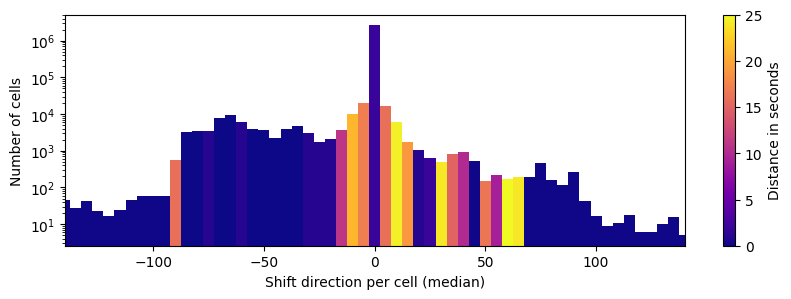

In [49]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import numpy as np
import json

with open('processed_things_2023_11_24.json') as f:
    processed_things = json.load(f)

max_distance = 0
distances = []

shifts = []

for thing_name, thing in processed_things.items():
    for day_idx in range(7):
        for hour_idx in range(24):
            if thing["MedianShifts"][day_idx][hour_idx] != -999999 and thing["Metrics"][day_idx][hour_idx] != -1:
                shifts.append(thing["MedianShifts"][day_idx][hour_idx])
                distance = thing["Metrics"][day_idx][hour_idx]
                distances.append(distance)
                if distance > max_distance:
                    max_distance = distance
                    
fig, ax = plt.subplots(figsize=(10, 3))
bin_size = 5
bin_min = -152.5
bin_max = 152.5
median_distance_per_bin = []
distances_per_bin = []
colors = []
color_map = plt.get_cmap('plasma')

for bin_idx in range(int((bin_max - bin_min) / bin_size)):
    distances_per_bin.append([])
for i in range(len(shifts)):
    bin_idx = int((shifts[i] - bin_min) / bin_size)
    if bin_idx >= 0 and bin_idx < len(distances_per_bin):
        distances_per_bin[bin_idx].append(distances[i])
for _distances in distances_per_bin:
    median_distance_per_bin.append(np.median(_distances))
_, _, patches = ax.hist(shifts, bins=np.arange(bin_min, bin_max, bin_size))
for i in range(len(patches)):
    percentage = median_distance_per_bin[i] / 25
    if percentage > 1:
        percentage = 1
    patches[i].set_facecolor(color_map(percentage))
ax.set_xlim(-140, 140)
ax.set_ylabel('Number of cells')
ax.set_xlabel('Shift direction per cell (median)')
ax.set_yscale('log')

# Show color bar
norm = Normalize(vmin=0, vmax=25)
sm = plt.cm.ScalarMappable(cmap=color_map, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Distance in seconds')

fig.savefig('shifts_histogram.pdf', bbox_inches='tight')
